In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

def evaluate_model(src, target, results):
    mae = []
    rmse = []
    psnr = []
    ssim = []
    
    for i in range(len(src)):
        tgt = target[i,:,:,0].astype(int)
        res = results[i,:,:,0] * 127.5 + 127.5
        res = res.astype(int)
        
        mae.append(mean_absolute_error(tgt, res))
        rmse.append(np.sqrt(mean_squared_error(tgt, res)))
        psnr.append(peak_signal_noise_ratio(tgt, res, data_range=255))
        ssim.append(structural_similarity(tgt, res, data_range=255))
    
    return np.mean(mae), np.std(mae), np.mean(rmse), np.std(rmse), np.mean(psnr), np.std(psnr), np.mean(ssim), np.std(ssim)

def print_metrics(model_name, mae_mean, mae_std, rmse_mean, rmse_std, psnr_mean, psnr_std, ssim_mean, ssim_std):
    print(f"Metrics for {model_name}:")
    print(f"  MAE - Mean: {mae_mean}, Std: {mae_std}")
    print(f"  RMSE - Mean: {rmse_mean}, Std: {rmse_std}")
    print(f"  PSNR - Mean: {psnr_mean}, Std: {psnr_std}")
    print(f"  SSIM - Mean: {ssim_mean}, Std: {ssim_std}")
    print()

# Load validation data
val_input_enhanced = np.load('Y:\\Tahseen\\projects\\deconvolution-GAN\\data\\ubm\\ubm_512_val.npz')
src = val_input_enhanced['arr_0']
target = val_input_enhanced['arr_1']

# Load results obtained from different models
results_unet = np.load('ubm_512_val_results_unet.npy')
results_attention = np.load('ubm_512_val_results_attention.npy')
results_resblock = np.load('ubm_512_val_results_resblock.npy')
results_resblock_attention = np.load('ubm_512_val_results_resblock_attention.npy')

# Evaluate each model and print metrics
unet_metrics = evaluate_model(src, target, results_unet)
attention_metrics = evaluate_model(src, target, results_attention)
resblock_metrics = evaluate_model(src, target, results_resblock)
resblock_attention_metrics = evaluate_model(src, target, results_resblock_attention)

print_metrics("U-Net", *unet_metrics)
print_metrics("Attention", *attention_metrics)
print_metrics("ResBlock", *resblock_metrics)
print_metrics("ResBlock with Attention", *resblock_attention_metrics)


Metrics for U-Net:
  MAE - Mean: 4.645620338439941, Std: 0.29445019993110755
  RMSE - Mean: 6.707463343200669, Std: 0.5048109369633215
  PSNR - Mean: 31.62417148715661, Std: 0.6523655033716479
  SSIM - Mean: 0.8474519808601626, Std: 0.003934388268691317

Metrics for Attention:
  MAE - Mean: 4.462558525085449, Std: 0.5689844284887958
  RMSE - Mean: 6.865364430983087, Std: 1.1095160480293889
  PSNR - Mean: 31.500997019130462, Std: 1.3115280716207725
  SSIM - Mean: 0.8579918339640444, Std: 0.025009493439234618

Metrics for ResBlock:
  MAE - Mean: 3.4179165344238283, Std: 0.20560107448639173
  RMSE - Mean: 4.966811453949457, Std: 0.4026733512914816
  PSNR - Mean: 34.23775415368043, Std: 0.7033749164579112
  SSIM - Mean: 0.9179270733199004, Std: 0.00207833849241599

Metrics for ResBlock with Attention:
  MAE - Mean: 2.4769028854370116, Std: 0.14514259571549779
  RMSE - Mean: 3.6453649048686216, Std: 0.2889311451350295
  PSNR - Mean: 36.92346457972336, Std: 0.6921941541447261
  SSIM - Mean: 

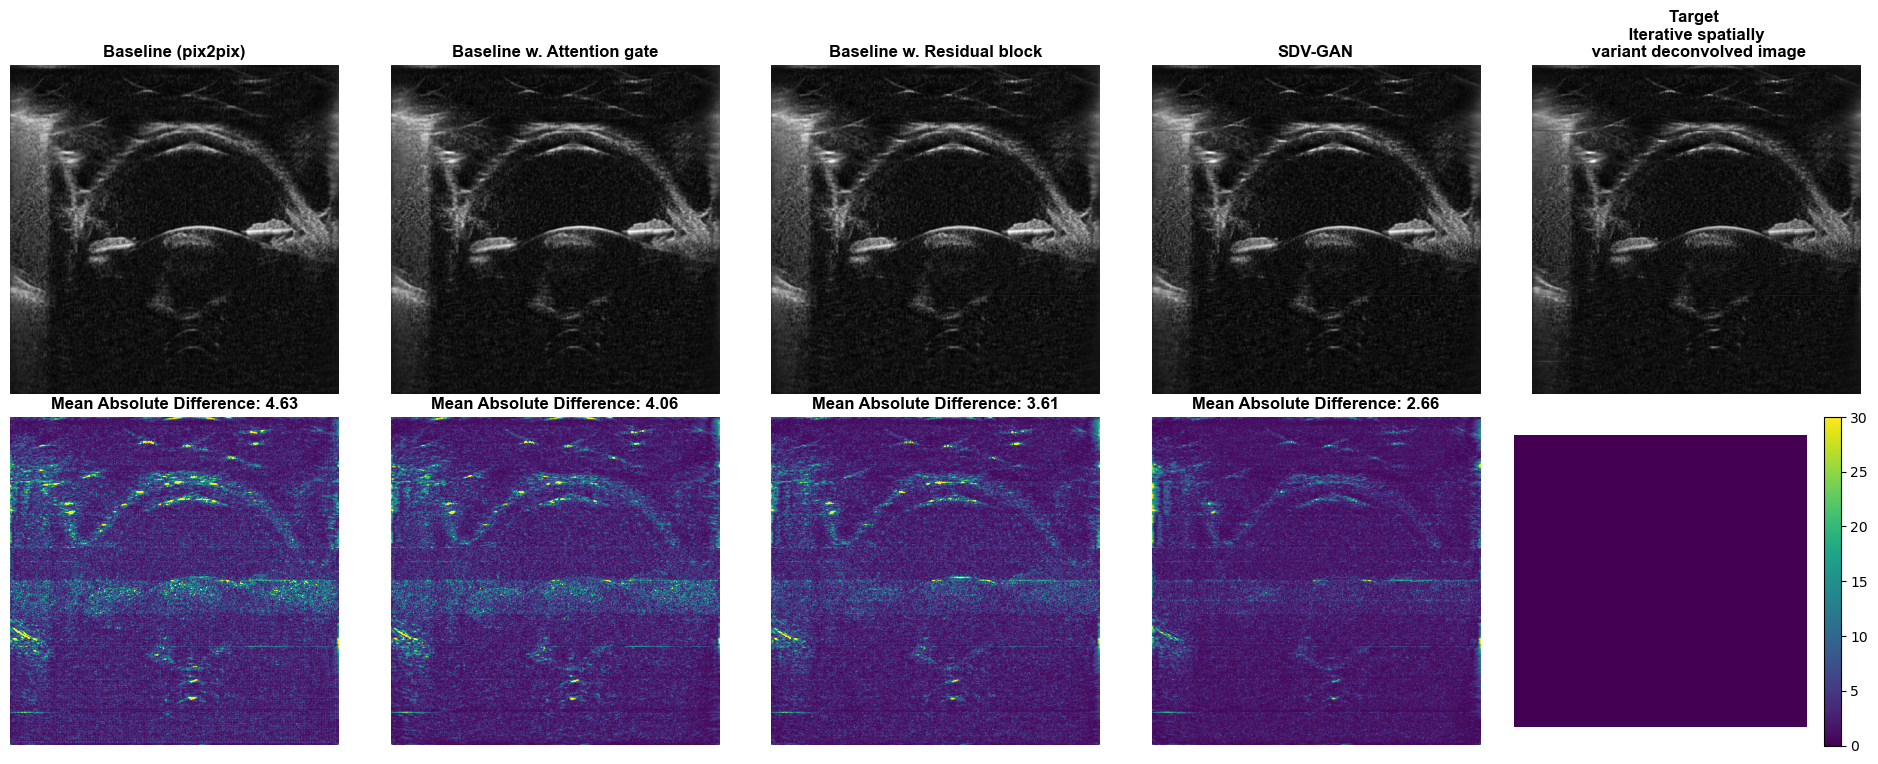

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib.colors import LinearSegmentedColormap

hfont = {'fontname':'Arial'}

idx = 130
# Define the customized colormap
viridis_custom_colors = plt.cm.viridis(np.linspace(0, 1, 256))
viridis_custom = LinearSegmentedColormap.from_list('viridis_custom', viridis_custom_colors, N=256)
# Create a normalization instance for the colorbar (not used in this example)
norm = plt.Normalize(0, 30)

# Calculate the number of columns and rows based on the screen width
screen_width = 1920  # Set your desired screen width
num_cols = 5
num_rows = 2

# Calculate the figure size to fit the images to the screen width
fig_width = screen_width / 100  # Assuming 100 pixels per inch
fig_height = fig_width * num_rows / num_cols

# Set up the figure with gridspec
fig = plt.figure(figsize=(fig_width, fig_height))

gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 1], height_ratios=[1, 1])

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.imshow((255*results_unet[idx,:,:,1] + 1)/2, cmap= 'gray')
plt.axis('off')
ax.set_title('Baseline (pix2pix)', **hfont,weight="bold")



ax = plt.subplot(gs[0, 1]) # row 0, col 0
plt.imshow((255*results_attention[idx,:,:,1] + 1)/2, cmap= 'gray')
plt.axis('off')
ax.set_title('Baseline w. Attention gate', **hfont,weight="bold")


ax = plt.subplot(gs[0, 2]) # row 0, col 0
plt.imshow((255*results_resblock[idx,:,:,1] + 1)/2, cmap= 'gray')
plt.axis('off')
ax.set_title('Baseline w. Residual block', **hfont,weight="bold")


ax = plt.subplot(gs[0, 3]) # row 0, col 0
plt.imshow((255*results_resblock_attention[idx,:,:,1] + 1)/2, cmap= 'gray')
plt.axis('off')
ax.set_title('SDV-GAN', **hfont,weight="bold")


ax = plt.subplot(gs[0, 4]) # row 0, col 0
plt.imshow(target[idx,:,:,1], cmap= 'gray')
plt.axis('off')
ax.set_title('Target \n Iterative spatially \n variant deconvolved image', **hfont,weight="bold")


ax = plt.subplot(gs[1, 0]) # row 0, col 0
plt.imshow(np.sqrt(abs((((results_unet[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2), cmap = viridis_custom, norm=norm)
plt.axis('off')
ax.set_title(f'Mean Absolute Difference: {np.mean(np.sqrt(abs((((results_unet[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2)):.2f}', **hfont,weight="bold")  # Add the mean value as a title


ax = plt.subplot(gs[1, 1]) # row 0, col 0
plt.imshow(np.sqrt(abs((((results_attention[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2), cmap = viridis_custom, norm=norm)
plt.axis('off')
ax.set_title(f'Mean Absolute Difference: {np.mean(np.sqrt(abs((((results_attention[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2)):.2f}', **hfont,weight="bold")  # Add the mean value as a title


ax = plt.subplot(gs[1, 2]) # row 0, col 0
plt.imshow(np.sqrt(abs((((results_resblock[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2), cmap = viridis_custom, norm=norm)
plt.axis('off')
ax.set_title(f'Mean Absolute Difference: {np.mean(np.sqrt(abs((((results_resblock[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2)):.2f}', **hfont,weight="bold")  # Add the mean value as a title


ax = plt.subplot(gs[1, 3]) # row 0, col 0
plt.imshow(np.sqrt(abs((((results_resblock_attention[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2), cmap = viridis_custom, norm=norm)
plt.axis('off')
ax.set_title(f'Mean Absolute Difference: {np.mean(np.sqrt(abs((((results_resblock_attention[idx,:,:,1]+1)/2)* 255) - target[idx,:,:,1])**2)):.2f}', **hfont,weight="bold")  # Add the mean value as a title

ax = plt.subplot(gs[1, 4]) # row 0, col 0
plt.imshow(abs(target[idx,:,:,1] - target[idx,:,:,1]), cmap = viridis_custom, norm = norm)
plt.axis('off')
   
plt.colorbar()
plt.tight_layout()
plt.show()